In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rcParams["font.size"] = 14

# Taylorpolynome für $\sin(x)$
Wir programmieren die berechneten Polynome explizit:    
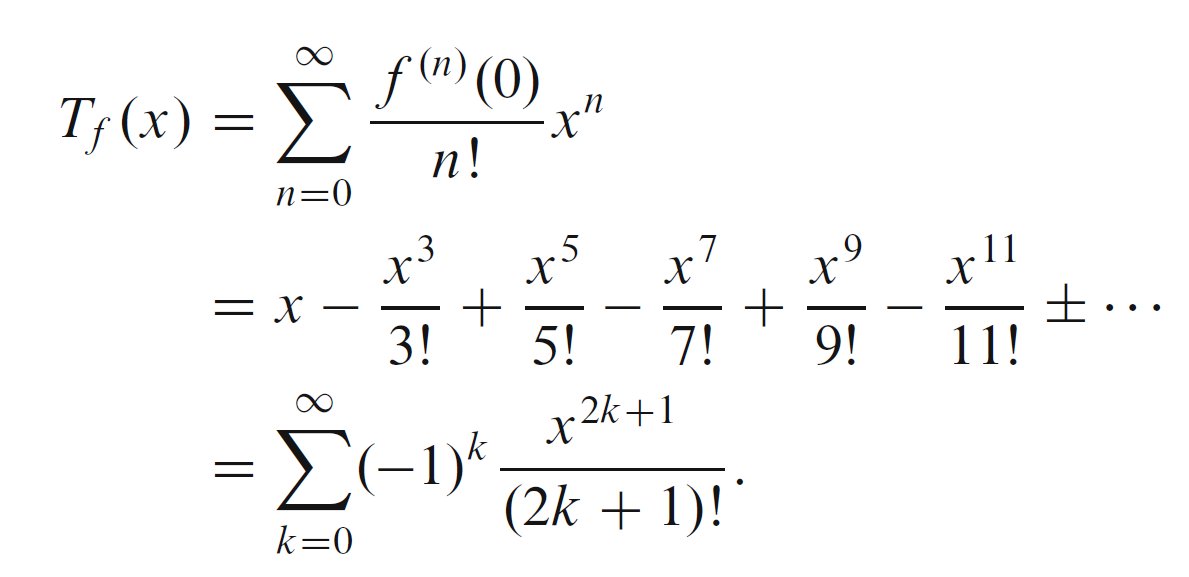

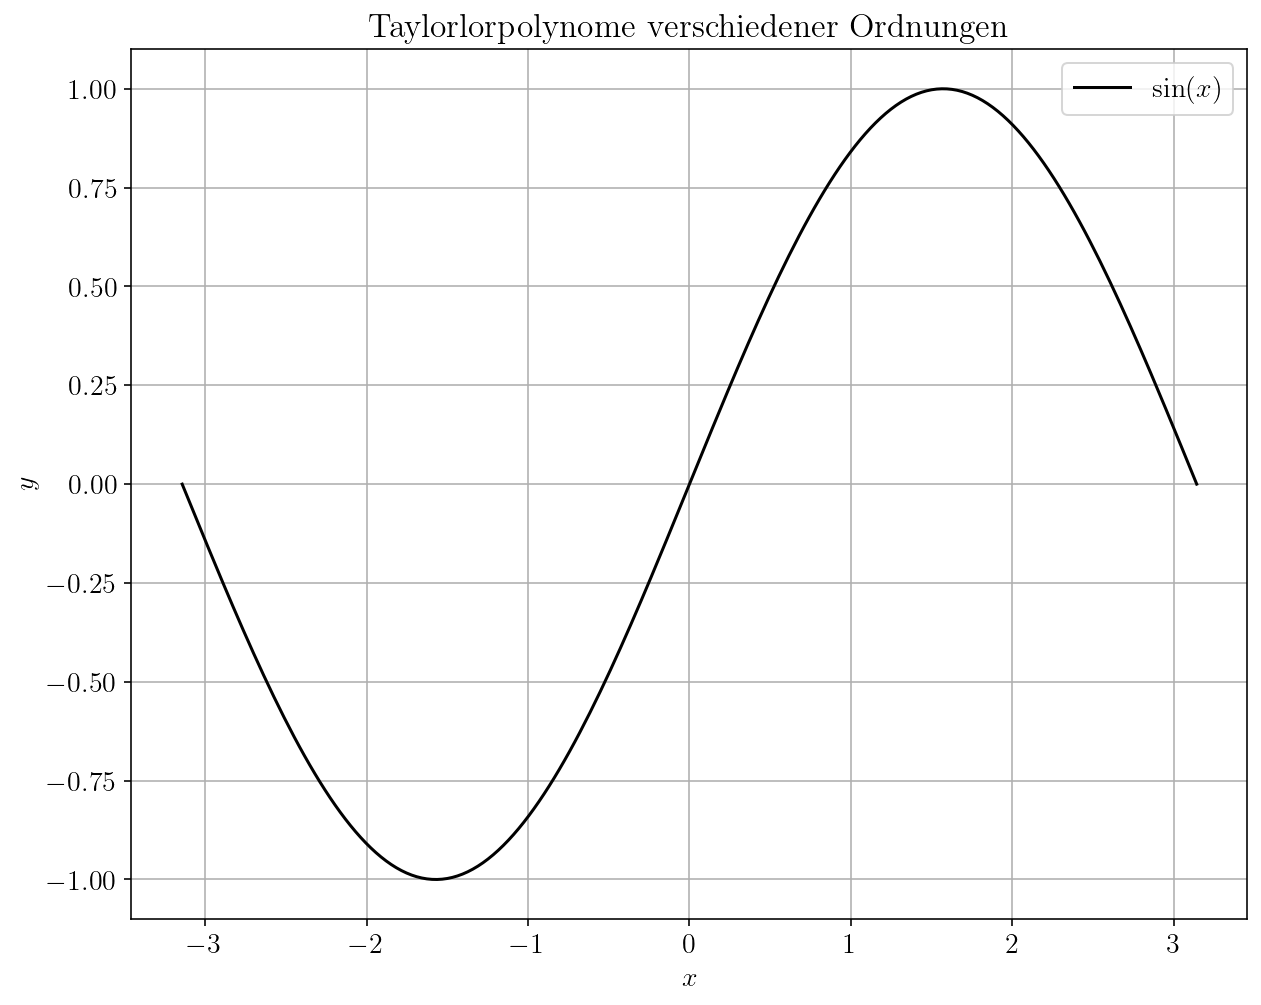

In [16]:
m = 0
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))
labels = ['$T_1(x)$', '$T_3(x)$', '$T_5(x)$', '$T_7(x)$']
plt.figure(figsize = (10,8))
for n, label in zip(range(m), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)
plt.plot(x, np.sin(x), 'k', label = '$\sin (x)$')
plt.grid()
plt.title('Taylorlorpolynome verschiedener Ordnungen')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

# Was von komplizierteren Funktionen wie $2\sin(x) + \cos(3x/2)$?
> Das `Python`-Package `SymPy` ermöglicht symbolische Berechnung von Ableitungen beliebiger Funktionen!
- `function.diff`

In [19]:
import sympy as sy
from sympy.functions import sin,cos

In [34]:
x = sy.Symbol('x')
f = 2*sin(x) + cos(3*x/2)

# Taylorpolynom als Näherung einer Funktion am Entwicklungspunkt x0:
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(np.math.factorial(i))*(x-x0)**i
        i += 1
    return p

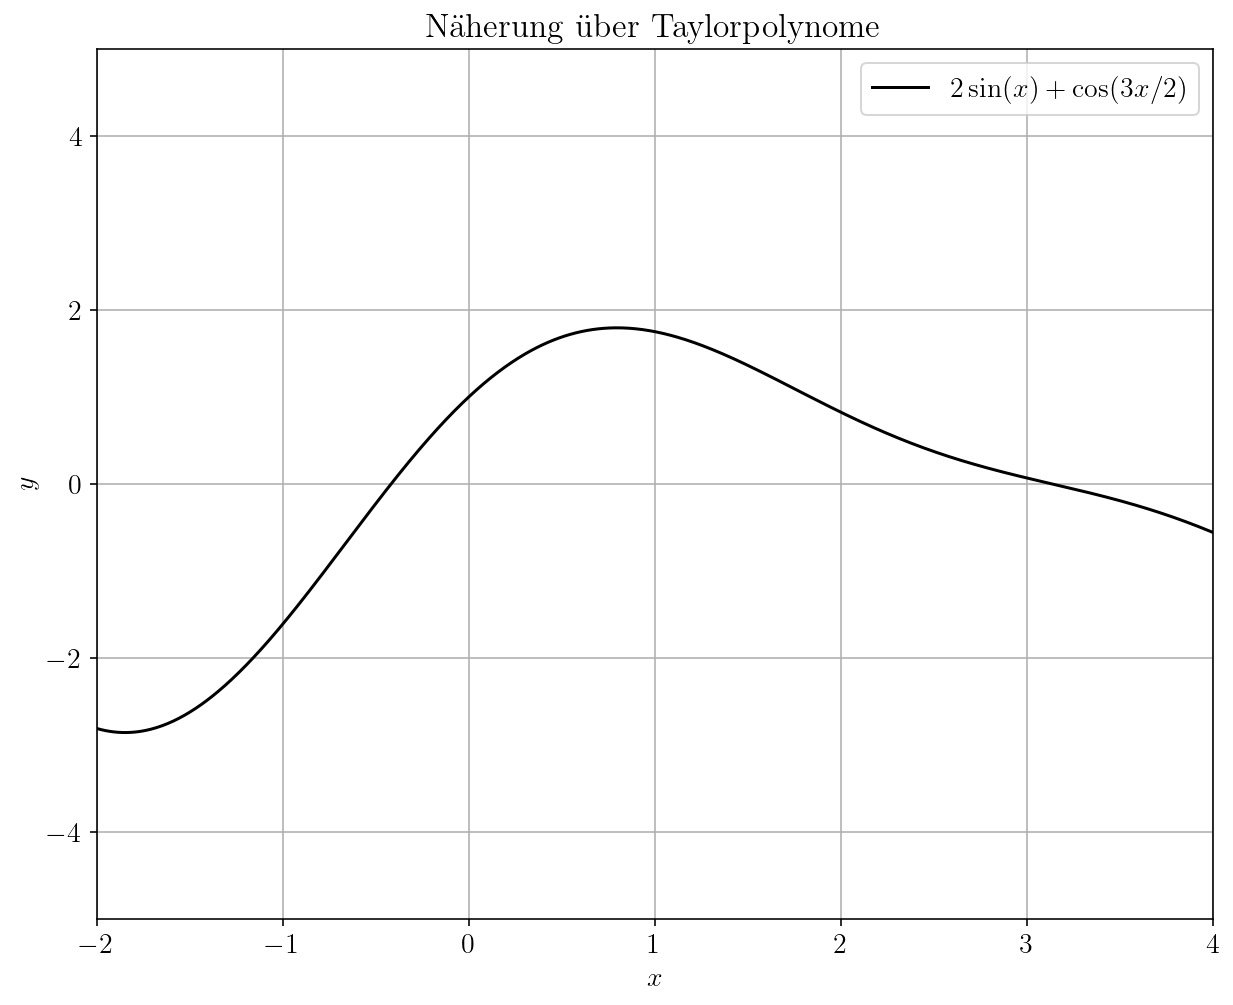

In [44]:
# Graphen zeichnen:
m = 0
def plot():
    x_lims = [-2,4]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    
    # Die ersten m Taylorpolynome
    for j in range(1,m,1):
        func = taylor(f,0,j)
        print('Taylorpolynom für m='+str(j)+':',func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='$m = $'+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1,2*np.sin(x1) + np.cos(3*x1/2),'k',label='$2\sin(x) + \cos(3x/2)$')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.grid(True)
    plt.title('Näherung über Taylorpolynome')
    plt.show()
plt.figure(figsize = (10,8))
plot()